# Lecture 5.1 We are gonna run a Project that is going to be single neuron logistic regression


The first step is to get the bank dataset, we are interested in predicting the Probability of someone willing to accept the bank loan

Dataset Information
Additional Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In this part, I am interested in seeing the 

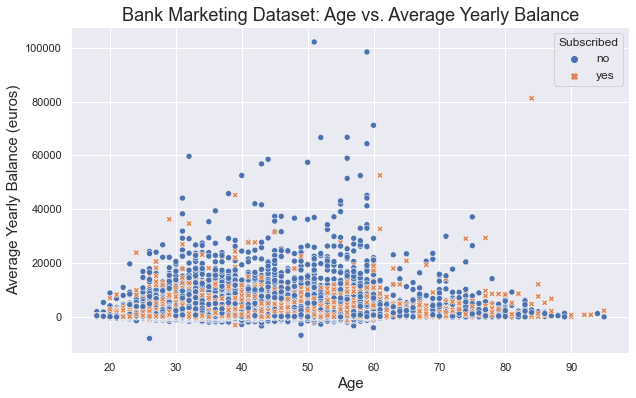

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assuming X and y are already loaded from your dataset
# Convert X to a DataFrame for easier manipulation
X_df = pd.DataFrame(X)

# Assuming 'age' is in column 0 and 'balance' in column 5 (based on your variables information)
# Also assuming y is a Series or array indicating subscription status


# No need to use .iloc since we're keeping all columns from X
data = pd.concat([X_df, y], axis=1)

# Assuming 'y' is your target variable, add it to your existing columns
# You'll need to know the name or position of 'y' in the original dataset if it's included, or simply add it as a new column if not
data.columns = list(X_df.columns) + ['subscribed']


# Now you can proceed with your plotting or further data manipulation


# Now let's plot
sns.set_theme()

fig, ax = plt.subplots(figsize=(10,6))

# We'll use scatterplot here; adjust 'hue' for your target variable
sns.scatterplot(data=data, x='age', y='balance', hue='subscribed', style='subscribed', ax=ax)

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Average Yearly Balance (euros)", fontsize=15)
ax.set_title("Bank Marketing Dataset: Age vs. Average Yearly Balance", fontsize=18)
plt.legend(title='Subscribed', fontsize=12)
plt.show()


As we analyze the Bank Marketing dataset, particularly focusing on the clients' average yearly balance, it's evident that a straightforward linear distinction between those who subscribed to a term deposit and those who did not might not be immediately apparent. This complexity arises due to the overlap in balance ranges among subscribers and non-subscribers.

Question: How will overlapping data affect the training process for a Perceptron single neuron?

Overlapping data can pose a challenge for a Perceptron, which fundamentally relies on finding a linear boundary to separate classes. If two classes overlap significantly in feature space, as might be observed with the balance feature in our dataset, the Perceptron might struggle to converge during training. This is because the algorithm continually adjusts its weights in response to misclassified instances, and overlapping areas where no clear linear boundary exists can lead to perpetual weight adjustments.

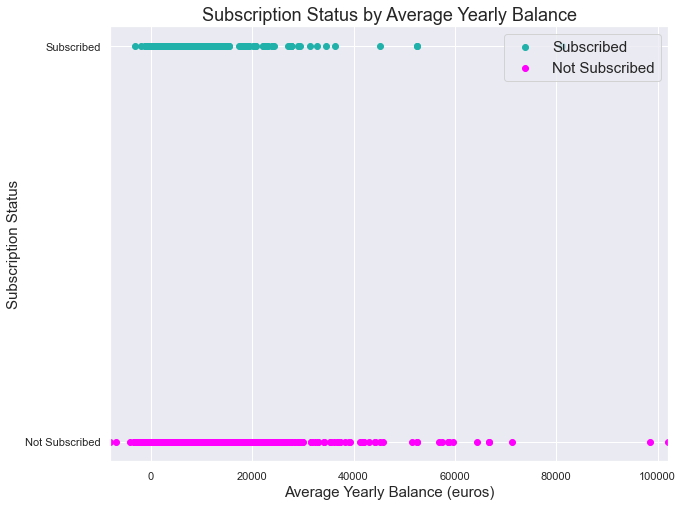

In [12]:
# Assuming 'balance' is represented in your DataFrame `data`
# And 'subscribed' is a binary target variable where 'yes' = 1 and 'no' = 0

plt.figure(figsize=(10, 8))
plt.xlim(data['balance'].min(), data['balance'].max())

# Visualize the balance for subscribed and not subscribed clients
subscribed = data[data['subscribed'] == 'yes']
not_subscribed = data[data['subscribed'] == 'no']

plt.scatter(subscribed['balance'], 
            np.ones(len(subscribed)),  # Plotting all subscribed clients at 1
            color="lightseagreen", 
            label="Subscribed")

plt.scatter(not_subscribed['balance'], 
            np.zeros(len(not_subscribed)),  # Plotting all not subscribed clients at 0
            color="magenta", 
            label="Not Subscribed")

# This line is hypothetical and would represent a balance threshold if one existed
# plt.vlines(threshold_balance, 0.0, 1.0, color='blue')

plt.xlabel("Average Yearly Balance (euros)", fontsize=15)
plt.ylabel("Subscription Status", fontsize=15)
plt.yticks([0, 1], ["Not Subscribed", "Subscribed"])  # Explicitly set the y-ticks to match our binary labels
plt.legend(fontsize=15, loc="upper right")
plt.title("Subscription Status by Average Yearly Balance", fontsize=18)
plt.show()


Seems like there isn't a good split between the people how choose to subscribe and the one doesn't. Now what we 

In [13]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [16]:
# Define the sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_hat, y):
    return -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

# Assuming 'data' is your DataFrame and it includes 'balance' and 'subscribed' columns
# Convert 'subscribed' to binary if it's not already
data['subscribed'] = data['subscribed'].map({'yes': 1, 'no': 0})

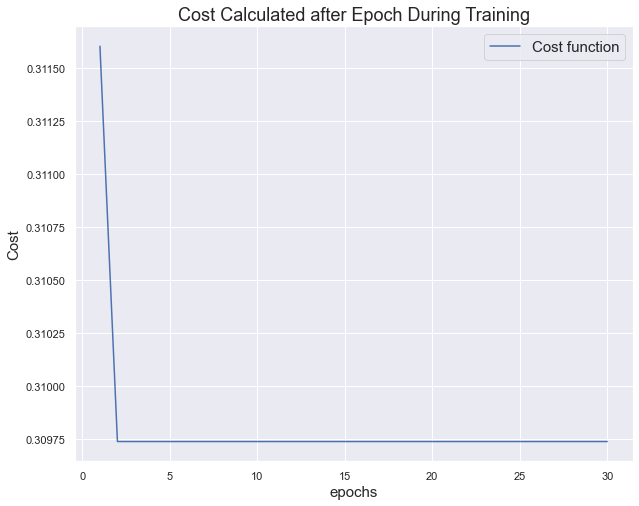

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the 'balance' feature and target 'subscribed'
X = data['balance'].values.reshape(-1, 1)  # Reshape for compatibility
y = data['subscribed'].values

# Standardize the 'balance' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the SingleNeuron with the sigmoid activation function and cross-entropy loss
node = SingleNeuron(sigmoid, cross_entropy_loss)

# Train the model
node.train(X_scaled, y, alpha=0.005, epochs=30)

# Plot the cost function over epochs
node.plot_cost_function()

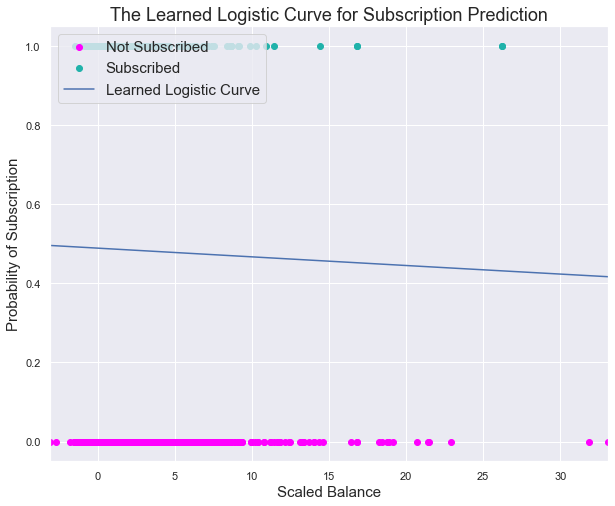

In [22]:
# Visualize the learned logistic curve
plt.figure(figsize=(10, 8))
plt.xlim((X_scaled.min(), X_scaled.max()))

# Map back to original 'balance' values for plotting
domain = np.linspace(X_scaled.min(), X_scaled.max(), 100)
predictions = node.predict(domain.reshape(-1, 1))

plt.scatter(X_scaled[y == 0], np.zeros(sum(y == 0)), color="magenta", label="Not Subscribed")
plt.scatter(X_scaled[y == 1], np.ones(sum(y == 1)), color="lightseagreen", label="Subscribed")
plt.plot(domain, predictions, label="Learned Logistic Curve")

plt.xlabel("Scaled Balance", fontsize=15)
plt.ylabel("Probability of Subscription", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("The Learned Logistic Curve for Subscription Prediction", fontsize=18)
plt.show()

I am going to be working 